Clayton Cohn<br>
May 20, 2020<br>
DSC 478<br>
Prof. Mobasher

# Assignment 4

In [1]:
import pandas as pd

DATA_PATH = "/Users/claytoncohn/Dropbox/New/DePaul/DSC478/data/segmentation_data/"

For this assignment you will experiment with Principal Component Analysis as a dimensionality reduction approach to assist in clustering high-dimensional data. 

You will also experiment with item-based recommendation for a joke recommender system.

__1. PCA for Reduced Dimensionality in Clustering [Dataset: segmentation_data.zip]__

For this problem you will use an image segmentation data set for clustering. 

You will experiment with using PCA as an approach to reduce dimensionality and noise in the data. 

You will compare the results of clustering the data with and without PCA using the provided image class assignments as the ground truth. 

The data set is divided into three files. The file "segmentation_data.txt" contains data about images with each line corresponding to one image. 

Each image is represented by 19 features (these are the columns in the data and correspond to the feature names in the file "segmentation_names.txt". 

The file "segmentation_classes.txt" contains the class labels (the type of image) and a numeric class label for each of the corresponding images in the data file. 

After clustering the image data, you will use the class labels to measure completeness and homogeneity of the generated clusters. 

The data set used in this problem is based on the Image Segmentation data set at the UCI Machine Learning Repository.

    a. Load in the image data matrix (with rows as images and columns as features). 

In [2]:
X = pd.read_csv(DATA_PATH + "segmentation_data.txt", header=None)
X.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,110.0,189.0,9,0.000000,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,86.0,187.0,9,0.000000,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,225.0,244.0,9,0.000000,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,47.0,232.0,9,0.000000,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,97.0,186.0,9,0.000000,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654
5,157.0,221.0,9,0.000000,0.0,1.055556,0.646930,1.222222,0.620633,12.111111,10.222222,8.111112,18.000000,-5.666666,-12.000000,17.666666,18.000000,0.549180,1.877146
6,62.0,224.0,9,0.000000,0.0,0.944445,1.083547,2.333333,1.632993,14.629630,13.222222,11.444445,19.222221,-4.222222,-9.555555,13.777778,19.222221,0.408965,1.860191
7,27.0,248.0,9,0.111111,0.0,1.611111,0.646930,3.166667,1.722401,15.296296,14.777778,12.888889,18.222221,-1.555556,-7.222222,8.777778,18.222221,0.312227,1.783512
8,44.0,233.0,9,0.000000,0.0,2.222222,2.146487,2.111111,1.327766,14.481482,12.555555,11.333333,19.555555,-5.777778,-9.444445,15.222222,19.555555,0.422174,1.950405
9,17.0,229.0,9,0.000000,0.0,2.111111,1.985130,2.444445,1.614747,13.703704,11.222222,11.111111,18.777779,-7.444445,-7.777778,15.222222,18.777779,0.439852,2.099904


    Also load in the numeric class labels from the segmentation class file. 

In [3]:
y = pd.read_csv(DATA_PATH + "segmentation_classes.txt", header=None, sep="\t").iloc[:, 1]
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: 1, dtype: int64

In [4]:
features = pd.read_csv(DATA_PATH + "segmentation_names.txt", header=None, sep="\t")
features.head()

,0
0,REGION-CENTROID-COL
1,REGION-CENTROID-ROW
2,REGION-PIXEL-COUNT
3,SHORT-LINE-DENSITY-5
4,SHORT-LINE-DENSITY-2


    Using your favorite method (e.g., sklearn's min-max scaler), perform min-max normalization on the data matrix
    so that each feature is scaled to [0,1] range.

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
X_norm = scaler.fit_transform(X)
X_norm[:5]

array([[4.30830040e-01, 7.41666667e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.42205474e-02, 6.72233922e-04, 2.73291926e-02,
        8.55743510e-04, 9.01110284e-02, 7.94165331e-02, 6.11192912e-02,
        1.30943107e-01, 7.31343290e-01, 1.41176540e-02, 8.72865267e-01,
        1.23711348e-01, 5.08138840e-01, 8.31849232e-01],
       [3.35968379e-01, 7.33333333e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.80228046e-02, 7.26095734e-04, 3.22981359e-02,
        5.41219947e-04, 9.57913810e-02, 8.50891441e-02, 6.84830672e-02,
        1.34840205e-01, 7.29477615e-01, 2.35294199e-02, 8.59582565e-01,
        1.27393216e-01, 4.63329080e-01, 8.36986460e-01],
       [8.85375494e-01, 9.70833333e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.15969577e-01, 2.21344355e-03, 6.70807367e-02,
        1.09658970e-03, 8.54634659e-02, 7.53646732e-02, 6.18556741e-02,
        1.20031165e-01, 7.36940304e-01, 3.88235327e-02, 8.27324481e-01,
        1.13402054e-01

    b. Using the Kmeans implementation in scikit-learn, perform clustering on the image data (use K = 7 in your 
    clustering so that later we can compare the clusters to the 7 pre-assigned image classes). 

In [6]:
#KMeans code taken from lecture notebook
from sklearn.cluster import KMeans

# Can only use Euclidean distance with sklearn KMeans
kmeans = KMeans(n_clusters=7,max_iter=1000,verbose=0)
kmeans.fit(X_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
clusters = kmeans.predict(X_norm)
clusters[:500]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 5, 4, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5,
       5, 5, 4, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 4, 4,
       4, 5, 4, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 5, 5, 4, 5, 4, 4, 5, 0,
       5, 4, 5, 4, 5, 4, 4, 4, 2, 4, 4, 5, 5, 4, 4, 4, 4, 5, 4, 5, 5, 4,
       5, 5, 5, 4, 4, 4, 5, 2, 5, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 2, 4, 4,
       4, 2, 4, 5, 4, 5, 5, 4, 4, 4, 5, 4, 2, 5, 4,

    Print the cluster centroids (use some formatting so that they are visually understandable).

In [8]:
pd.options.display.float_format='{:,.2f}'.format
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features)
centroids

,"(REGION-CENTROID-COL,)","(REGION-CENTROID-ROW,)","(REGION-PIXEL-COUNT,)","(SHORT-LINE-DENSITY-5,)","(SHORT-LINE-DENSITY-2,)","(VEDGE-MEAN,)","(VEDGE-SD,)","(HEDGE-MEAN,)","(HEDGE-SD,)","(INTENSITY-MEAN,)","(RAWRED-MEAN,)","(RAWBLUE-MEAN,)","(RAWGREEN-MEAN,)","(EXRED-MEAN,)","(EXBLUE-MEAN,)","(EXGREEN-MEAN,)","(VALUE-MEAN,)","(SATURATION-MEAN,)","(HUE-MEAN,)"
0,0.77,0.43,0.00,0.01,0.02,0.04,0.00,0.02,0.00,0.04,0.03,0.06,0.03,0.78,0.22,0.49,0.06,0.54,0.24
1,0.54,0.15,0.00,0.03,0.00,0.03,0.00,0.03,0.00,0.82,0.78,0.89,0.79,0.27,0.67,0.29,0.89,0.21,0.13
2,0.25,0.39,0.00,0.08,0.02,0.08,0.00,0.06,0.01,0.15,0.14,0.18,0.12,0.72,0.34,0.35,0.18,0.41,0.20
3,0.51,0.81,0.00,0.08,0.01,0.05,0.00,0.05,0.00,0.11,0.09,0.09,0.14,0.68,0.08,0.82,0.13,0.41,0.89
4,0.30,0.53,0.00,0.05,0.05,0.10,0.01,0.08,0.01,0.40,0.37,0.47,0.35,0.50,0.57,0.21,0.47,0.30,0.16
5,0.75,0.53,0.00,0.04,0.04,0.11,0.02,0.11,0.02,0.30,0.28,0.35,0.26,0.59,0.45,0.31,0.35,0.30,0.16
6,0.25,0.46,0.00,0.03,0.01,0.04,0.00,0.03,0.00,0.03,0.02,0.04,0.02,0.77,0.22,0.51,0.04,0.80,0.18


    To evaluate your clusters, first perform Silhouette analysis on the clusters (compute Silhouette values for all 
    instances in the data, and then compute the overall mean Silhouette value; optionally, you can provide a 
    visaulization of the Silhouettes). 

In [9]:
# Silhouette analysis code taken from lecture notebooks
from sklearn import metrics

silhouettes = metrics.silhouette_samples(X_norm, clusters)
print(silhouettes[:20])

[0.57236961 0.5609926  0.46537332 0.49551578 0.57187855 0.55971567
 0.54247867 0.41212038 0.51997981 0.46760414 0.48688779 0.49140278
 0.58398756 0.56254708 0.37898897 0.5311416  0.5484396  0.4226305
 0.41603628 0.40351227]


In [10]:
print(silhouettes.mean())

0.3320742908894385


In [11]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import pylab as pl

def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    pl.axvline(silhouette_avg, color="red", linestyle="--") 

    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')

    pl.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    pl.show()
    
    return

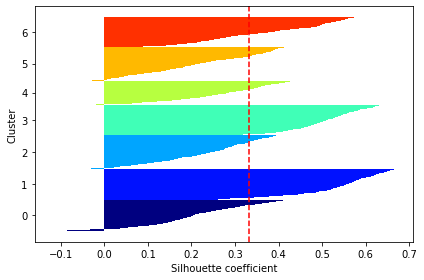

In [12]:
plot_silhouettes(X_norm, clusters)

    Next, compare your 7 clusters to the 7 pre-assigned classes by computing the Completeness and Homogeneity 
    values of the generated clusters.

In [13]:
# Code for homogeneity and completeness taken from lecture notebooks
from sklearn.metrics import completeness_score, homogeneity_score

print(completeness_score(y,clusters))

0.6117374684331665


In [14]:
print(homogeneity_score(y,clusters))

0.6100499914689614


    c. Perform PCA on the normalized image data matrix. 
    
    You may use the linear algebra package in Numpy or the Decomposition module in scikit-learn (the latter is much more efficient). 

In [15]:
# PCA code taken from lecture notebooks
from sklearn import decomposition

meanVals = np.mean(X_norm, axis=0)
meanRemoved = X_norm - meanVals #remove mean
covMat = np.cov(meanRemoved, rowvar=0)

np.set_printoptions(precision=2,suppress=True,linewidth=100)
print(covMat)

[[ 0.08  0.    0.   -0.   -0.   -0.    0.   -0.    0.    0.    0.    0.01  0.01 -0.01  0.    0.
   0.01 -0.01  0.  ]
 [ 0.    0.06  0.    0.    0.    0.   -0.    0.   -0.   -0.03 -0.03 -0.03 -0.03  0.02 -0.02  0.02
  -0.03  0.    0.04]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.  ]
 [-0.    0.    0.    0.02 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.    0.   -0.    0.
  -0.   -0.    0.  ]
 [-0.    0.    0.   -0.    0.01  0.    0.    0.    0.   -0.   -0.   -0.   -0.   -0.    0.   -0.
  -0.    0.   -0.  ]
 [-0.    0.    0.   -0.    0.    0.01  0.    0.    0.   -0.   -0.    0.   -0.   -0.    0.   -0.
   0.   -0.   -0.  ]
 [ 0.   -0.    0.   -0.    0.    0.    0.    0.    0.   -0.   -0.    0.    0.   -0.    0.    0.
   0.    0.   -0.  ]
 [-0.    0.    0.   -0.    0.    0.    0.    0.01  0.    0.    0.    0.    0.   -0.    0.   -0.
   0.   -0.   -0.  ]
 [ 0.   -0.    0.   -0.    0.    0.    0.    0.    0.    0.   

In [16]:
import numpy.linalg as la
eigVals,eigVects = la.eig(np.mat(covMat))
print("Eigenvalues: ",eigVals)
print("Eigenvectors:",eigVects)

Eigenvalues:  [0.48 0.1  0.08 0.04 0.03 0.02 0.01 0.01 0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
Eigenvectors: [[ 0.03 -0.35  0.93  0.04 -0.01  0.03  0.01  0.03 -0.   -0.02 -0.01  0.01 -0.    0.    0.   -0.
  -0.   -0.    0.  ]
 [-0.19 -0.38 -0.12 -0.66 -0.47  0.14 -0.24  0.22  0.06  0.07  0.06 -0.04 -0.01 -0.01  0.    0.
  -0.   -0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    1.  ]
 [-0.01 -0.03 -0.04 -0.03  0.06  0.6   0.72  0.32  0.06  0.08  0.01 -0.01 -0.   -0.    0.    0.
   0.    0.    0.  ]
 [-0.    0.02  0.01 -0.1  -0.09 -0.44  0.28  0.32 -0.77  0.05  0.07 -0.    0.01  0.   -0.   -0.
  -0.    0.    0.  ]
 [ 0.    0.02  0.01 -0.12 -0.03 -0.42  0.3   0.11  0.44 -0.34  0.55  0.28 -0.11 -0.01 -0.   -0.
  -0.   -0.    0.  ]
 [ 0.    0.01  0.01 -0.01 -0.01 -0.18  0.12  0.07  0.18 -0.14  0.05 -0.77  0.55  0.01 -0.    0.
  -0.    0.    0.  ]
 [ 0.01  0.   -0.   -0.14 -0.03 -0.33  0.19  0.16  0.29 

In [17]:
eigValInd = np.argsort(eigVals)  #sort, sort goes smallest to largest
eigValInd = eigValInd[::-1]   #reverse
sortedEigVals = eigVals[eigValInd]
print(sortedEigVals)
total = sum(sortedEigVals)
varPercentage = sortedEigVals/total*100
print(varPercentage)

[0.48 0.1  0.08 0.04 0.03 0.02 0.01 0.01 0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
[60.71 13.2  10.12  4.54  3.55  1.99  1.89  1.62  1.07  0.71  0.39  0.16  0.05  0.    0.    0.
  0.    0.    0.  ]


    Analyze the principal components to determine the number, r, of PCs needed to capture at least 95% of variance in the data.     

In [18]:
total = 0
for i in range(10):
    total += varPercentage[i]
    print("{} PCs: {}".format(i+1, total))
    if total >= 95: break
        
topNfeat = 7

1 PCs: 60.714233968533236
2 PCs: 73.91121320168925
3 PCs: 84.03498614256189
4 PCs: 88.57852534332582
5 PCs: 92.12588648109565
6 PCs: 94.1139219796062
7 PCs: 96.00589227704954


The above shows us that we will need 7 principal compents to capture 95% of the variance.

    Provide a plot of PC variances.

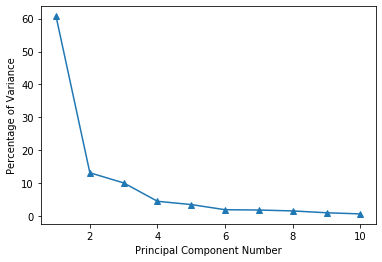

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 11), varPercentage[:10], marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

    Then use these r components as features to transform the data into a reduced dimension space.

In [20]:
topEigValInd = eigValInd[:topNfeat]  #cut off unwanted dimensions
reducedEigVects = eigVects[:,topEigValInd]   #reorganize eig vects largest to smallest
reducedDT = np.dot(meanRemoved, reducedEigVects)    #transform data into new dimensions
print(reducedDT)

[[-0.69 -0.53 -0.25 ... -0.08 -0.05 -0.05]
 [-0.67 -0.51 -0.34 ... -0.04 -0.06 -0.04]
 [-0.71 -0.77  0.16 ... -0.17 -0.04 -0.06]
 ...
 [-0.51  0.13  0.08 ... -0.03  0.03 -0.11]
 [-0.48  0.09  0.16 ...  0.    0.   -0.09]
 [-0.44  0.11  0.05 ...  0.02  0.21  0.15]]


    d. Perform Kmeans again, but this time on the lower dimensional transformed data. 

In [21]:
kmeans = KMeans(n_clusters=7,max_iter=1000,verbose=0)
kmeans.fit(reducedDT)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
clusters = kmeans.predict(reducedDT)
clusters[:500]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 2, 6, 6, 6, 6, 2, 2, 6, 6, 6, 6, 6, 6,
       6, 2, 6, 6, 6, 6, 2, 6, 2, 6, 2, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 2, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 2, 6, 6, 6, 6,
       2, 6, 2, 6, 6, 6, 2, 2, 2, 6, 2, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 6, 6, 2, 6, 2, 2, 6, 4, 6, 2, 6, 2, 6, 2,
       2, 2, 5, 2, 2, 6, 6, 2, 2, 2, 2, 6, 2, 6, 6, 2, 6, 6, 6, 2, 2, 2, 6, 5, 6, 2, 2, 2, 2, 2, 6,
       6, 6, 6, 6, 5, 2, 2, 2, 5, 2, 6, 2, 6, 6, 2, 2, 2, 6, 2, 5, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6,


In [23]:
pd.options.display.float_format='{:,.2f}'.format
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids

,0,1,2,3,4,5,6
0,-0.62,-0.64,-0.20,0.09,-0.07,-0.01,0.04
1,-0.60,0.36,-0.11,0.13,-0.13,0.02,-0.04
2,0.44,0.10,-0.16,-0.23,-0.05,0.01,0.02
3,1.41,-0.09,-0.04,0.17,-0.03,0.01,-0.02
4,-0.51,0.06,0.34,0.07,0.08,-0.01,-0.03
5,-0.21,0.25,-0.15,-0.06,0.13,0.01,0.03
6,0.18,-0.04,0.26,-0.18,0.03,-0.02,0.00


    Then compare Silhouette values as well as completeness and Homogeneity values of the new clusters. 

In [24]:
silhouettes = metrics.silhouette_samples(reducedDT, clusters)
print(silhouettes.mean())

0.35974995402470983


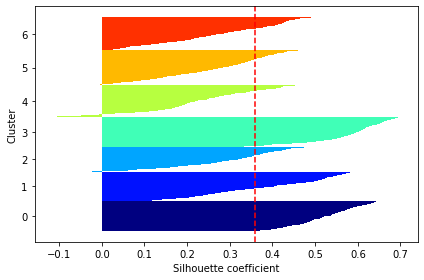

In [25]:
plot_silhouettes(reducedDT, clusters)

In [26]:
print(completeness_score(y,clusters))

0.6112983626480734


In [27]:
print(homogeneity_score(y,clusters))

0.6096453882709606


    Compare these results with those obtained on the full data in part b.

The results are eerily similar, which is pretty incredible considering we just ditched 12 dimensions. In fact, the mean of the silhouettes is actually slightly higher with PCA, probably due to not overfitting the extraneous dimensions.

__2. Item-Based Joke Recommendation [Dataset: jokes.zip]__

For this problem you will use a modified version of the item-based recommender algorithm from Ch. 14 of Machine Learning in Action and use it on joke ratings data based on Jester Online Joke Recommender System. 

The modified version of the code is provided in the module itemBasedRec.py. 

Most of the module will be used as is, but you will add some additional functionality.

The data set contains two files. The file "modified_jester_data.csv" contains the ratings on 100 jokes by 1000 users (each row is a user profile). 

The ratings have been normalized to be between 1 and 21 (a 20-point scale), with 1 being the lowest rating. A zero indicated a missing rating. The file "jokes.csv" contains the joke ids mapped to the actual text of the jokes.

Your tasks in this problem are the following (please also see comments for the function stubs in the provided module):

    a. Load in the joke ratings data and the joke text data into appropriate data structures. 

In [28]:
DATA_PATH = "/Users/claytoncohn/Dropbox/New/DePaul/DSC478/data/jokes/"

In [29]:
X = pd.read_csv(DATA_PATH + "modified_jester_data.csv", header=None)
X.head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.18,19.79,1.34,2.84,3.48,2.50,1.15,15.17,2.02,6.24,...,13.82,0.00,0.00,0.00,0.00,0.00,5.37,0.00,0.00,0.00
1,15.08,10.71,17.36,15.37,8.62,1.34,10.27,5.66,19.88,20.22,...,13.82,6.05,10.71,18.86,10.81,8.86,14.06,11.34,6.68,12.07
2,0.00,0.00,0.00,0.00,20.03,20.27,20.03,20.27,0.00,0.00,...,0.00,0.00,0.00,20.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,19.35,0.00,0.00,12.80,19.16,8.18,17.21,0.00,12.84,...,0.00,0.00,0.00,11.53,0.00,0.00,0.00,0.00,0.00,0.00
4,19.50,15.61,6.83,5.61,12.36,12.60,18.04,15.61,10.56,16.73,...,16.19,16.58,15.27,16.19,16.73,12.55,14.11,17.55,12.80,12.60
5,4.83,7.46,11.44,2.50,3.91,6.68,2.31,10.13,4.35,9.20,...,7.46,4.11,10.32,8.04,8.82,7.65,11.05,1.92,5.95,7.55
6,0.00,0.00,0.00,0.00,19.59,1.15,18.72,19.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,13.33,0.00,0.00,0.00,0.00
7,17.84,14.16,20.17,4.79,2.84,9.30,20.27,12.41,5.81,6.58,...,18.23,9.88,10.90,5.32,7.84,7.65,13.14,10.95,12.31,11.00
8,7.21,7.46,1.58,4.11,2.26,10.71,5.71,2.07,3.14,9.40,...,15.37,10.71,15.17,10.71,10.71,10.71,10.71,10.71,7.60,6.05
9,14.01,16.15,16.15,14.01,17.41,16.15,19.93,13.52,14.01,19.16,...,0.00,15.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [30]:
y = pd.read_csv(DATA_PATH + "jokes.csv", header=None)
y.head(10)

,0,1
0,0,"A man visits the doctor. The doctor says ""I ha..."
1,1,This couple had an excellent relationship goin...
2,2,Q. What's 200 feet long and has 4 teeth? A. Th...
3,3,Q. What's the difference between a man and a t...
4,4,Q. What's O. J. Simpson's Internet address? A....
5,5,Bill & Hillary are on a trip back to Arkansas....
6,6,How many feminists does it take to screw in a ...
7,7,Q. Did you hear about the dyslexic devil worsh...
8,8,A country guy goes into a city bar that has a ...
9,9,Two cannibals are eating a clown one turns to ...


In [31]:
# Sim functions taken from lecture notebook

def euclidSim(inA,inB):
    return 1.0/(1.0 + la.norm(inA - inB))

def pearsonSim(inA,inB):
    if len(inA) < 3 : return 1.0
    return 0.5+0.5*np.corrcoef(inA, inB, rowvar = 0)[0][1]

def cosineSim(inA,inB):
    num = float(inA.T*inB)
    denom = la.norm(inA)*la.norm(inB)
    return 0.5+0.5*(num/denom)

In [32]:
# standEst taken from lecture notebook

def standEst(dataMat, user, simMeas, item):
    n = np.shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    for j in range(n):
        userRating = dataMat[user,j]
        if userRating == 0: 
            continue
        overLap = np.nonzero(np.logical_and(dataMat[:,item]>0, dataMat[:,j]>0))[0]
        if len(overLap) == 0: 
            similarity = 0
        else: 
            similarity = simMeas(dataMat[overLap,item], dataMat[overLap,j])
        #print('the %d and %d similarity is: %f' % (item, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

In [33]:
# svdEst taken from lecture notebook

def svdEst(dataMat, user, simMeas, item):
    n = np.shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    data = np.mat(dataMat)
    U,Sigma,VT = la.svd(data)
    Sig4 = np.mat(np.eye(4)*Sigma[:4]) #arrange Sig4 into a diagonal matrix
    xformedItems = data.T * U[:,:4] * Sig4.I  #create transformed items
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0 or j==item: continue
        similarity = simMeas(xformedItems[item,:].T, xformedItems[j,:].T)
        #print('the %d and %d similarity is: %f' % (item, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

In [34]:
# recommend function taken from lecture notebooks

def recommend(dataMat, user, N=3, simMeas=cosineSim, estMethod=standEst):
    unratedItems = np.nonzero(dataMat[user,:].A==0)[1] #find unrated items 
    if len(unratedItems) == 0: return 'you rated everything'
    itemScores = []
    for item in unratedItems:
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        itemScores.append((item, estimatedScore))
    return sorted(itemScores, key=lambda jj: jj[1], reverse=True)[:N]

    Use the "recommend" function to provide top 5 joke recommendations for at least 2 users. 
    
    Use both standard item-based collaborative filtering (based on the rating prediction function "standEst") and 
    the SVD-based version of the item-based CF (using "svdEst" as the prediction engine) to generate these 
    recommendations for the two users and note the differences. 

In [35]:
user1 = 42
user2 = 45

X_data = np.mat(X)

In [36]:
rec_user1_standEst = recommend(X_data, user1, N=5, simMeas=cosineSim, estMethod=standEst)
rec_user1_svdEst = recommend(X_data, user1, N=5, simMeas=cosineSim, estMethod=svdEst)

rec_user2_standEst = recommend(X_data, user2, N=5, simMeas=cosineSim, estMethod=standEst)
rec_user2_svdEst = recommend(X_data, user2, N=5, simMeas=cosineSim, estMethod=svdEst)

    You should show the text of the recommended jokes as well as the predicted ratings for each.

In [37]:
print("User1: standEst\n\nRank\tJoke Number\tPredicted Rating\n")
for i in range(len(rec_user1_standEst)):
    print("{}\t     {}\t\t{}\n{}\n".format(i+1,rec_user1_standEst[i][0],rec_user1_standEst[i][1],y.iloc[rec_user1_standEst[i][0]][1]))

User1: standEst

Rank	Joke Number	Predicted Rating

1	     99		14.625867625333052
Q: What's the difference between greeting a Queen and greeting thePresident of the United  States?A: You only have to get on one knee to greet the queen.

2	     97		14.621723838538415
Age and Womanhood1. Between the ages of 13 and 18 ... She is like Africa virgin and unexplored. 2. Between the ages of 19 and 35 ... She is like Asia hot and exotic. 3. Between the ages of 36 and 45 ... She is like America fully explored breathtakingly beautiful and free with her resources.4. Between the ages of 46 and 56 ...She is like Europe exhausted but still has points of interest. 5. After 56 she is like Australia ...Everybody knows it's down there but who gives a damn?

3	     50		14.620904524644963
Did you hear that Clinton has announced there is a new national bird?  The spread eagle.

4	     51		14.61968307812138
Q: What do Monica Lewinsky and Bob Dole have in common?A: They were both upset when Bill finished firs

In [38]:
print("User1: svdEst\n\nRank\tJoke Number\tPredicted Rating\n")
for i in range(len(rec_user1_svdEst)):
    print("{}\t     {}\t\t{}\n{}\n".format(i+1,rec_user1_svdEst[i][0],rec_user1_svdEst[i][1],y.iloc[rec_user1_svdEst[i][0]][1]))

User1: svdEst

Rank	Joke Number	Predicted Rating

1	     38		15.073065233770512
What is the difference between men and women:A woman wants one man to satisfy her every need.A man wants every woman to satisfy his one need.

2	     11		15.050019172280996
A guy stood over his tee shot for what seemed an eternity looking up looking down measuring the distance figuring the wind direction and speed. Driving his partner nuts.Finally his exasperated partner says "What the hell is taking so long? Hit the goddamn ball!"The guy answers "My wife is up there watching me from the clubhouse. I want to make this a perfect shot.""Well hell man you don't stand a snowball's chance in hell of hitting her from here!" 

3	     51		15.032975461919149
Q: What do Monica Lewinsky and Bob Dole have in common?A: They were both upset when Bill finished first.

4	     5		15.008523633117134
Bill & Hillary are on a trip back to Arkansas. They're almost out of gas so Bill pulls into a service station on the outskirts 

In [39]:
print("User2: standEst\n\nRank\tJoke Number\tPredicted Rating\n")
for i in range(len(rec_user2_standEst)):
    print("{}\t     {}\t\t{}\n{}\n".format(i+1,rec_user2_standEst[i][0],rec_user2_standEst[i][1],y.iloc[rec_user2_standEst[i][0]][1]))

User2: standEst

Rank	Joke Number	Predicted Rating

1	     71		11.222517642758593
On the first day of college the Dean addressed the students pointing out some of the rules:"The female dormitory will be out-of-bounds for all male students and the male dormitory to the female students. Anybody caught breaking this rule will be fined $20 the first time." He continued "Anybody caught breaking this rule the second time will be fined $60. Being caught a third time will cost you a fine of $180. Are there any questions ?"At this point a male student in the crowd inquired:"How much for a season pass ?"

2	     75		11.21905070910725
There once was a man and a woman that both  got in  a terrible car wreck. Both of their vehicles  were completely destroyed buy fortunately no one  was   hurt.  In thankfulness the woman said to the man 'We are both okay so we should celebrate. I have   a  bottle of wine in my car let's open it.' So the woman got the bottle out of the car and  handed it to the man. 

In [40]:
print("User2: svdEst\n\nRank\tJoke Number\tPredicted Rating\n")
for i in range(len(rec_user2_svdEst)):
    print("{}\t     {}\t\t{}\n{}\n".format(i+1,rec_user2_svdEst[i][0],rec_user2_svdEst[i][1],y.iloc[rec_user2_svdEst[i][0]][1]))

User2: svdEst

Rank	Joke Number	Predicted Rating

1	     70		11.07362956769775
At a recent Sacramento PC Users Group meeting a company was demonstrating its latest speech-recognition software.   A representative from the company was just about ready to start the demonstration and asked everyone in the room to quiet down.Just then someone in the back of the room yelled"Format C: Return."Someone else chimed in:"Yes Return"Unfortunately the software worked.

2	     73		11.071105120448296
Q: How many stalkers does it take to change a light bulb?A: Two. One to replace the bulb and the other to watch it day and night.

3	     75		11.060817258401034
There once was a man and a woman that both  got in  a terrible car wreck. Both of their vehicles  were completely destroyed buy fortunately no one  was   hurt.  In thankfulness the woman said to the man 'We are both okay so we should celebrate. I have   a  bottle of wine in my car let's open it.' So the woman got the bottle out of the car and  han

    b. Complete the definition for the function "test". 
    
    This function iterates over all users and for each performs evaluation (by calling the provided 
    "cross_validate_user" function), and returns the error information necessary to compute 
    Mean Absolute Error (MAE).

In [41]:
import sys
sys.path.insert(0, DATA_PATH)

import itemBasedRec as ibr

In [42]:
X.shape

(1000, 100)

In [43]:
# test template taken from itemBasedRec.py

def test(dataMat, test_ratio, estMethod, simMeas=pearsonSim):
    # Write this function to iterate over all users and for each perform evaluation by calling
    # the above cross_validate_user function on each user. MAE will be the ratio of total error 
    # across all test cases to the total number of test cases, across all users
    
    # Must keep running count of MAE and number of test cases
    total_error = 0
    total_count = 0

    # Iterate through 
    for i in range(len(dataMat)):
        error_u, count_u = ibr.cross_validate_user(dataMat, i, test_ratio, eval(estMethod), simMeas)
        total_error += error_u
        total_count += count_u
    
    MAE = total_error/total_count
    
    return MAE

    Use this function to perform evaluation (with 20% test-ratio for each user) comparing MAE results using the 
    rating prediction function "standEst" with results using the "svdEst" prediction function. 
    
    [Note: See comments provided in the module for hints on accomplishing these tasks.]

In [44]:
mae_standEst = test(X, 0.2, "standEst")
mae_svdEst = test(X, 0.2, "svdEst")
print("MAE standEst:\t",mae_standEst)
print("MAE svdEst:\t",mae_svdEst)

MAE standEst:	 3.7419780410220804
MAE svdEst:	 3.622335319180131


    c. Write a new function "print_most_similar_jokes" which takes the joke ratings data, a query joke id, 
    a parameter k for the number similar jokes, and a similarity metric function, and prints the text of the query joke as well as the texts of the top k most similar jokes based on user ratings. 
    
    [Note: For hints on how to accomplish this task, please see comments at the end of the provided module as well as comments for the provided stub function.]


In [45]:
# template for print_most_similar_jokes taken from provided module

def print_most_similar_jokes(dataMat, jokes, queryJoke, k, metric=pearsonSim):
    # Write this function to find the k most similar jokes (based on user ratings) to a queryJoke
    # The queryJoke is a joke id as given in the 'jokes.csv' file (an corresponding to the a column in dataMat)
    # You must compare ratings for the queryJoke (the column in dataMat corresponding to the joke), to all
    # other joke rating vectors and return the top k. Note that this is the same as performing KNN on the 
    # columns of dataMat. The function must retrieve the text of the joke from 'jokes.csv' file and print both
    # the queryJoke text as well as the text of the returned top-k jokes.
    
    # Transpose matrix so rows are jokes
    jokeMat = dataMat.T
    
    # Store tuples of (distance, joke ID) and then sort
    sims = []
    
    # Iterate through the jokes
    for i in range(len(jokeMat)):
        
        # Ignore queryJoke
        if (i == queryJoke): continue;
        
        # Get the similarity between the query joke and joke i
        sim = metric(jokeMat[queryJoke], jokeMat[i])
        
        # Add the similarity and joke id to the array
        sims.append((sim,i))
    
    # Sort the list descending by similarity
    sims.sort(reverse=True)
        
    print("Top {} most similar jokes to joke {}:\n\n{}".format(k,queryJoke,jokes.iloc[queryJoke][1]))
    for i in range(k):
        joke = sims[i]
        print("\nJoke {}, similarity {:0.4f}:".format(i+1,joke[0]))
        print(jokes.iloc[joke[1]][1])
    return

In [46]:
print_most_similar_jokes(X,y,0,5)

Top 5 most similar jokes to joke 0:

A man visits the doctor. The doctor says "I have bad news for you.You have cancer and Alzheimer's disease". The man replies "Well thank God I don't have cancer!"

Joke 1, similarity 0.8155:
Q. What's the difference between a man and a toilet? A. A toilet doesn't follow you around after you use it.

Joke 2, similarity 0.8147:
Q: What do Monica Lewinsky and Bob Dole have in common?A: They were both upset when Bill finished first.

Joke 3, similarity 0.8029:
Q: How do you keep a computer programmer in the shower all day long?A: Give them a shampoo with a label that says"rinse lather repeat".

Joke 4, similarity 0.8012:
A woman has twins and gives them up for adoption.  One of them goes to a family in Egypt and is named "Amal."  The other goes to a  family in Spain; they name him "Juan."  Years later Juan sends a picture of himself to his mom.  Upon receiving the picture she tells her husband that she wishes she also had a picture of Amal.  Her husband 

    d. [Extra Credit]: Develop your own item-based collaborative filtering recommender that uses a 
    model-based approach (separating the training and the prediction tasks). 
    
    In the training component, item-item similarities for all pairs of items are computed and stored in an 
    appropriate data structure. 
    
    Your training function should be able to use different similarity functions (passed as a parameter) 
    including Cosine Similarity or Pearson Correlation.

In [47]:
# Get jokes as rows
X = pd.read_csv(DATA_PATH + "modified_jester_data.csv", header=None)
X = X.T
X.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,3.18,15.08,0.00,0.00,19.50,4.83,0.00,17.84,7.21,14.01,...,0.00,13.38,13.09,0.00,14.54,12.94,15.27,16.58,3.67,9.88
1,19.79,10.71,0.00,19.35,15.61,7.46,0.00,14.16,7.46,16.15,...,0.00,20.27,7.17,0.00,16.83,5.47,11.39,16.63,4.45,11.73
2,1.34,17.36,0.00,0.00,6.83,11.44,0.00,20.17,1.58,16.15,...,0.00,13.57,9.16,0.00,8.38,16.19,16.39,15.85,3.67,9.16
3,2.84,15.37,0.00,0.00,5.61,2.50,0.00,4.79,4.11,14.01,...,0.00,9.98,8.62,0.00,13.57,5.51,5.37,7.89,3.67,9.50
4,3.48,8.62,20.03,12.80,12.36,3.91,19.59,2.84,2.26,17.41,...,12.07,2.02,7.65,13.96,17.84,6.92,7.41,14.40,9.40,13.52


In [48]:
# Split data
from sklearn.model_selection import train_test_split

SEED = 33

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
78,0.00,19.64,0.00,0.00,0.00,1.15,0.00,1.87,10.71,0.00,...,0.00,0.00,0.00,17.60,15.90,7.55,4.06,0.00,7.21,0.00
97,0.00,11.34,0.00,0.00,17.55,1.92,0.00,10.95,10.71,0.00,...,0.00,0.00,0.00,0.00,14.64,5.47,0.00,0.00,3.77,0.00
29,3.57,17.99,0.00,0.00,15.61,4.06,0.00,6.83,10.71,16.15,...,0.00,9.59,6.34,12.07,16.58,5.13,9.79,10.03,3.62,13.67
84,0.00,19.98,0.00,11.63,14.93,10.71,0.00,1.10,7.60,15.56,...,12.21,0.00,0.00,0.00,15.95,7.89,0.00,0.00,4.16,0.00
38,2.60,10.13,20.08,18.18,15.51,5.61,0.00,4.93,15.42,14.01,...,16.05,14.45,10.81,14.83,14.40,7.80,15.76,11.24,3.38,14.25


In [49]:
def getItemSims(data,metric=pearsonSim):
    sims = []
    for i in range(len(data)):
        for j in range(i, len(data)):
            
            # Skip comparing similar jokes
            if i == j: continue
                
            # Get the similarity between the two jokes
            sim = metric(data[i], data[j])
            item = (sim,i,j)
            sims.append(item)
    
    # After all comparisons, sort
    sims.sort(reverse=True)
    return sims

In [50]:
item_sims = getItemSims(X_train)
item_sims[:10]

[(0.9366996388217678, 60, 67),
 (0.9281184407526155, 36, 67),
 (0.9211802501682792, 9, 60),
 (0.9192813981299488, 9, 67),
 (0.9107610183340304, 36, 60),
 (0.9090741242524762, 9, 36),
 (0.9033655670147729, 9, 22),
 (0.9015833108579466, 22, 51),
 (0.8948706176603536, 48, 60),
 (0.8928510919236995, 24, 60)]

In [51]:
# Get transposed matrix to evaluate users
X_users = X.T
X_users[:10]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.18,19.79,1.34,2.84,3.48,2.50,1.15,15.17,2.02,6.24,...,13.82,0.00,0.00,0.00,0.00,0.00,5.37,0.00,0.00,0.00
1,15.08,10.71,17.36,15.37,8.62,1.34,10.27,5.66,19.88,20.22,...,13.82,6.05,10.71,18.86,10.81,8.86,14.06,11.34,6.68,12.07
2,0.00,0.00,0.00,0.00,20.03,20.27,20.03,20.27,0.00,0.00,...,0.00,0.00,0.00,20.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,19.35,0.00,0.00,12.80,19.16,8.18,17.21,0.00,12.84,...,0.00,0.00,0.00,11.53,0.00,0.00,0.00,0.00,0.00,0.00
4,19.50,15.61,6.83,5.61,12.36,12.60,18.04,15.61,10.56,16.73,...,16.19,16.58,15.27,16.19,16.73,12.55,14.11,17.55,12.80,12.60
5,4.83,7.46,11.44,2.50,3.91,6.68,2.31,10.13,4.35,9.20,...,7.46,4.11,10.32,8.04,8.82,7.65,11.05,1.92,5.95,7.55
6,0.00,0.00,0.00,0.00,19.59,1.15,18.72,19.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,13.33,0.00,0.00,0.00,0.00
7,17.84,14.16,20.17,4.79,2.84,9.30,20.27,12.41,5.81,6.58,...,18.23,9.88,10.90,5.32,7.84,7.65,13.14,10.95,12.31,11.00
8,7.21,7.46,1.58,4.11,2.26,10.71,5.71,2.07,3.14,9.40,...,15.37,10.71,15.17,10.71,10.71,10.71,10.71,10.71,7.60,6.05
9,14.01,16.15,16.15,14.01,17.41,16.15,19.93,13.52,14.01,19.16,...,0.00,15.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


    The prediction (or estimation) function should take as parameters a target user, an item, a value of k, 
    and the similarities data structure and return the predicted rating on the target item for the target user. 
    
    The predicted rating should be based on the weighted average of the target user's ratings on k most similar 
    items to the target item.

In [52]:
def predictRating(user, joke, k, sims):
        
    # Isolate the item similarties pertinent to the joke in question (top k)
    simsMat = [sims[i] for i in range(len(sims)) if sims[i][1] == joke or sims[i][2] == joke][:k]
    
    # Get indices of topK jokes
    topK_ind = []
    for i in range(len(simsMat)):
        if simsMat[i][1] != joke:
            topK_ind.append(simsMat[i][1])
        else: 
            topK_ind.append(simsMat[i][2])
    
    # Get user's average rating of each topK joke
    ratings = []
    for n in topK_ind:
        rating = X_users[user][n]
        if rating != 0: ratings.append(rating)

    # Return average of top k
    return np.mean(ratings)

In [53]:
USER = 5
JOKE = 4
K = 5

prediction = predictRating(USER, JOKE, K, item_sims)
print("User {} predicted {} for joke {}.".format(USER, prediction, JOKE))
print("User {} actual rating {} for joke {}.".format(USER, X_users[USER][JOKE], JOKE))

User 5 predicted 17.262 for joke 4.
User 5 actual rating 12.6 for joke 4.


    You should test the prediction accuracy of your estimation function (using a cross-validation similar to 
    part b, above) and provide a plot of cross-validation accuracies across a range of values of k.

In [54]:
# Look at k in range(50)
predictions = [predictRating(USER, JOKE, i, item_sims) for i in range(1,50) ]
predictions[:10]

[16.68,
 18.28,
 18.896666666666665,
 17.6375,
 17.262,
 17.076666666666668,
 15.355714285714287,
 15.831249999999999,
 16.173333333333332,
 16.438]

In [55]:
# Compare distance of actual joke and predicted joke
dists = [abs(predictions[i] - X_users[USER][JOKE]) for i in range(len(predictions))]
dists[:10]

[4.08,
 5.6800000000000015,
 6.296666666666665,
 5.0375,
 4.662000000000001,
 4.476666666666668,
 2.755714285714287,
 3.2312499999999993,
 3.5733333333333324,
 3.837999999999999]

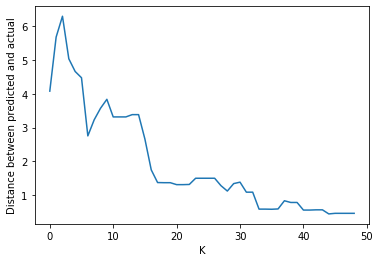

In [56]:
import matplotlib.pyplot as plt
plt.plot(dists)
plt.ylabel('Distance between predicted and actual')
plt.xlabel('K')
plt.show()

In [57]:
# Best K = min distance between predicted and actual
best_K = dists.index(min(dists)) + 1
best_K

45

    Using the best value of k, demonstrate the functionality of your recommender by generating recommendations 
    for several anecdotal users (similar to part a, above).

In [58]:
USER = 12
JOKE = 5

prediction = predictRating(USER, JOKE, best_K, item_sims)
print("User {} predicted {} for joke {}.".format(USER, prediction, JOKE))
print("User {} actual rating {} for joke {}.".format(USER, X_users[USER][JOKE], JOKE))

User 12 predicted 11.190444444444443 for joke 5.
User 12 actual rating 6.0 for joke 5.


In [59]:
USER = 89
JOKE = 14

prediction = predictRating(USER, JOKE, best_K, item_sims)
print("User {} predicted {} for joke {}.".format(USER, prediction, JOKE))
print("User {} actual rating {} for joke {}.".format(USER, X_users[USER][JOKE], JOKE))

User 89 predicted 9.6032 for joke 14.
User 89 actual rating 12.12 for joke 14.


In [60]:
USER = 94
JOKE = 76

prediction = predictRating(USER, JOKE, best_K, item_sims)
print("User {} predicted {} for joke {}.".format(USER, prediction, JOKE))
print("User {} actual rating {} for joke {}.".format(USER, X_users[USER][JOKE], JOKE))

User 94 predicted 11.222000000000001 for joke 76.
User 94 actual rating 18.14 for joke 76.
